In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error


from google.colab import drive
drive.mount('/content/drive')

# Veri yükleme
df = pd.read_csv("/content/drive/MyDrive/proje4/hepsiemlak.csv",sep=",")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.shape

(687, 1)

In [ ]:
# İlk beş veriyi gösterme
df.head()

,date,category,ad,loc,floor,age,rooms,gross,price
0,26-09-2024,Daire,Menderes Mh. Öğrenciye Kiralık 4+1 130 M2 Tera...,İzmir / Buca / Menderes Mah.,2. Kat,25 Yaşında,4 + 1,130 m²,20.000
1,11-10-2024,Daire,Goldia Yapı'Dan Merkezi Konumda Sıfır Eşyalı K...,İzmir / Buca / Kozağaç Mah.,Ara Kat,4 Yaşında,1 + 1,55 m²,17.500
2,11-10-2024,Daire,Buca Atatürk Mah.'Nde Eşyalı Kiralık Daire (1+1),İzmir / Buca / Atatürk Mah.,En Üst Kat,18 Yaşında,Stüdyo,70 m²,18.500
3,11-10-2024,Daire,İzmir Buca Laleli Mahallesi//Konak Tünelinden ...,İzmir / Buca / Laleli Mah.,4. Kat,25 Yaşında,2 + 1,90 m²,13.000
4,10-10-2024,Daire,Kuruluş Emlaktan Site İçi Kiralık 2+1 130m2 Daire,İzmir / Buca / Mustafa Kemal Mah.,Ara Kat,4 Yaşında,2 + 1,130 m²,29.500


In [ ]:
# Veri silme ve dönüştürme

df["age"] = df["age"].astype(str)
df["age"] = df["age"].str.replace(" Yaşında", "").replace("Sıfır Bina", "0")

df["age"] = pd.to_numeric(df["age"], errors='coerce').fillna(0).astype(int)

df["rooms"] = df["rooms"].apply(lambda x: int(str(x).split("+")[0]) if "+" in str(x) else 1)

df["gross"] = df["gross"].astype(str).str.replace(" m²", "")
df["gross"] = pd.to_numeric(df["gross"], errors='coerce')

df["price"] = df["price"].astype(str).str.replace(".", "", regex=False).str.replace(",", "", regex=False).astype(float)

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df["loc"] = df["loc"].astype(str)
df["loc"] = label_encoder.fit_transform(df["loc"])

df["floor"] = df["floor"].astype(str)
df["floor"] = label_encoder.fit_transform(df["floor"])

🔎 Eksik değer analizi:
loc      0
floor    0
age      0
rooms    0
gross    0
price    0
dtype: int64


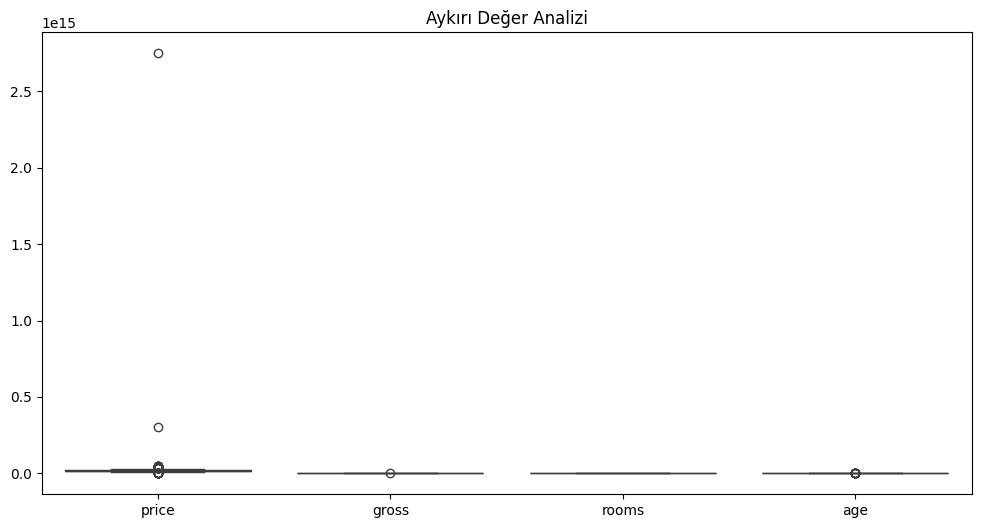

In [ ]:
# Eksik değer analizi
print("🔎 Eksik değer analizi:")
print(df.isnull().sum())

# Aykırı değer analizi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df[["price", "gross", "rooms", "age"]])
plt.title("Aykırı Değer Analizi")
plt.show()

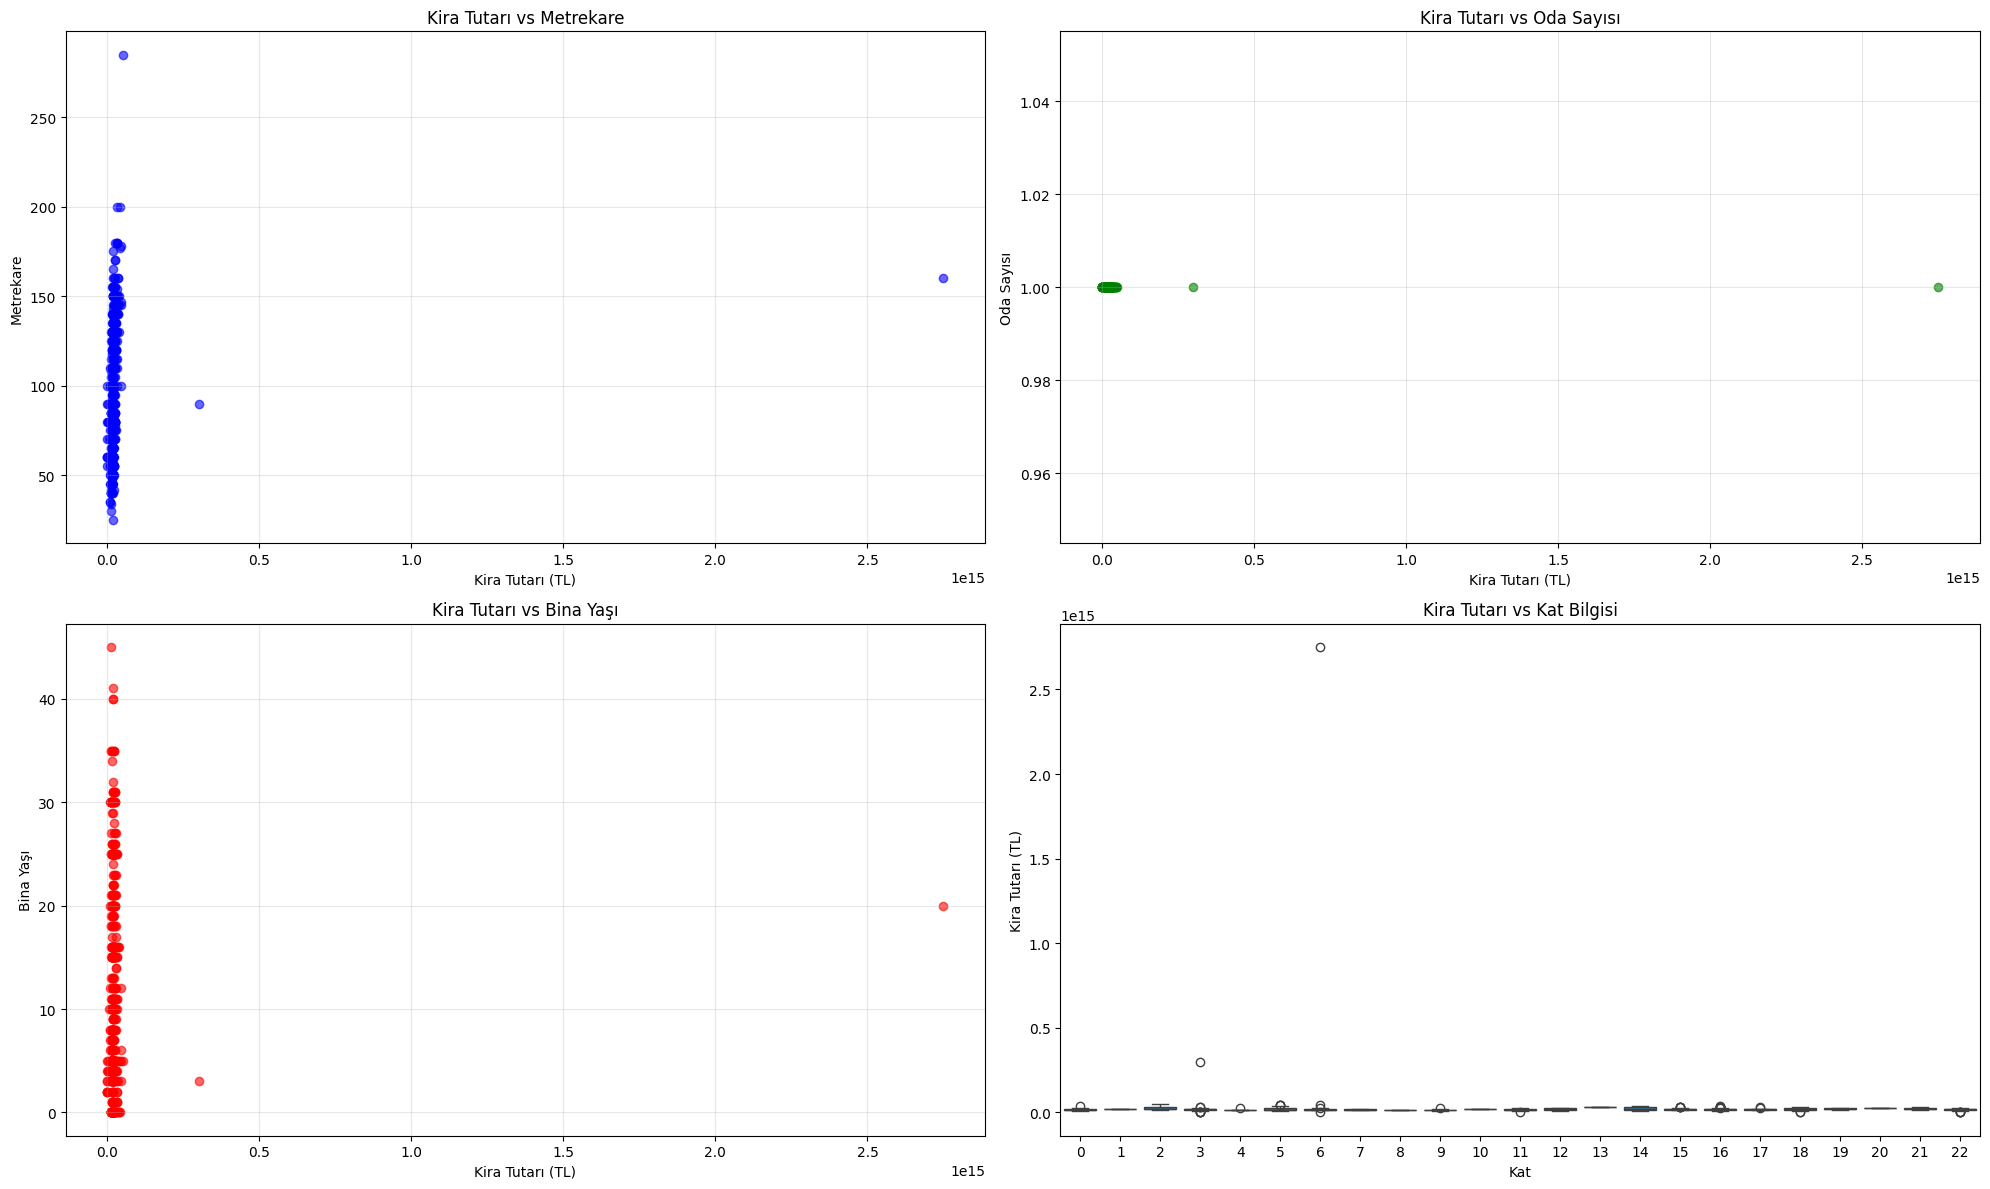

Linear Regression - RMSE: 25494357159225.57, MAPE: 2.09, R2: -0.06
XGBoost - RMSE: 163517024589953.84, MAPE: 2.18, R2: -42.70


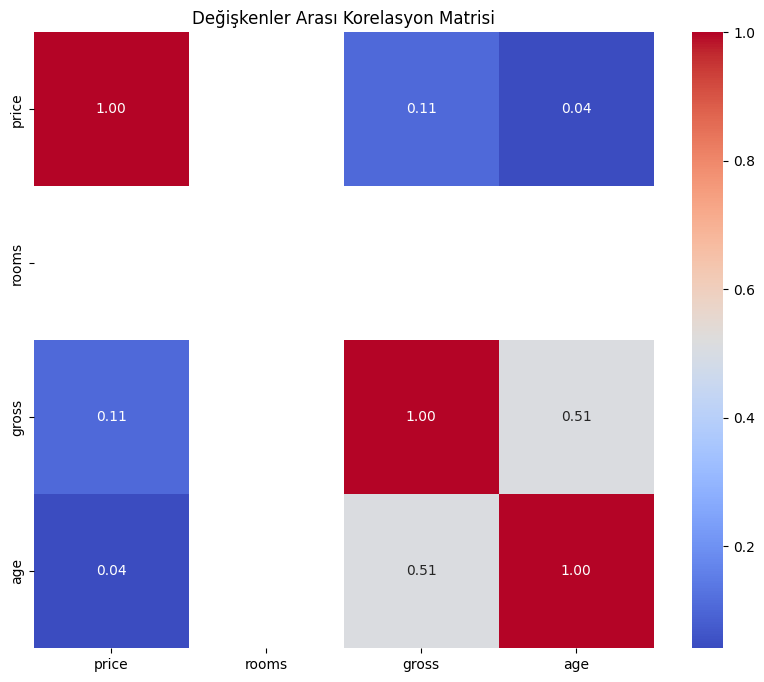

In [ ]:
# Gereksiz sütunları kaldırma
df = df[["loc", "floor", "age", "rooms", "gross", "price"]]

# Bağımlı ve bağımsız değişkenleri belirleme
X = df.drop(columns=["price"])
y = df["price"]

# Veri setini eğitim ve test olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 📊 Grafiksel Görselleştirme
plt.figure(figsize=(20, 12))

plt.subplot(2, 2, 1)
plt.scatter(df["price"], df["gross"], alpha=0.6, color="blue")
plt.title("Kira Tutarı vs Metrekare")
plt.xlabel("Kira Tutarı (TL)")
plt.ylabel("Metrekare")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 2)
plt.scatter(df["price"], df["rooms"], alpha=0.6, color="green")
plt.title("Kira Tutarı vs Oda Sayısı")
plt.xlabel("Kira Tutarı (TL)")
plt.ylabel("Oda Sayısı")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 3)
plt.scatter(df["price"], df["age"], alpha=0.6, color="red")
plt.title("Kira Tutarı vs Bina Yaşı")
plt.xlabel("Kira Tutarı (TL)")
plt.ylabel("Bina Yaşı")
plt.grid(True, alpha=0.3)

plt.subplot(2, 2, 4)
sns.boxplot(x="floor", y="price", data=df)
plt.title("Kira Tutarı vs Kat Bilgisi")
plt.xlabel("Kat")
plt.ylabel("Kira Tutarı (TL)")

plt.tight_layout()
plt.show()

# 🔥 Regresyon Modelleri
# Linear Regression Modeli
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Linear Regression metriklerini hesaplama
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)


# XGBoost Modeli
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# XGBoost metriklerini hesaplama
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)


print(f"Linear Regression - RMSE: {rmse_lr:.2f}, MAPE: {mape_lr:.2f}, R2: {r2_lr:.2f}")
print(f"XGBoost - RMSE: {rmse_xgb:.2f}, MAPE: {mape_xgb:.2f}, R2: {r2_xgb:.2f}")


# Korelasyon Analizi
plt.figure(figsize=(10, 8))
sns.heatmap(df[["price", "rooms", "gross", "age"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arası Korelasyon Matrisi")
plt.show()


📊 Regresyon Modelleri Karşılaştırması:
               Model          RMSE      MAPE
0  Linear Regression  2.617919e+11  2.584060
1            XGBoost  2.437057e+11  1.571584


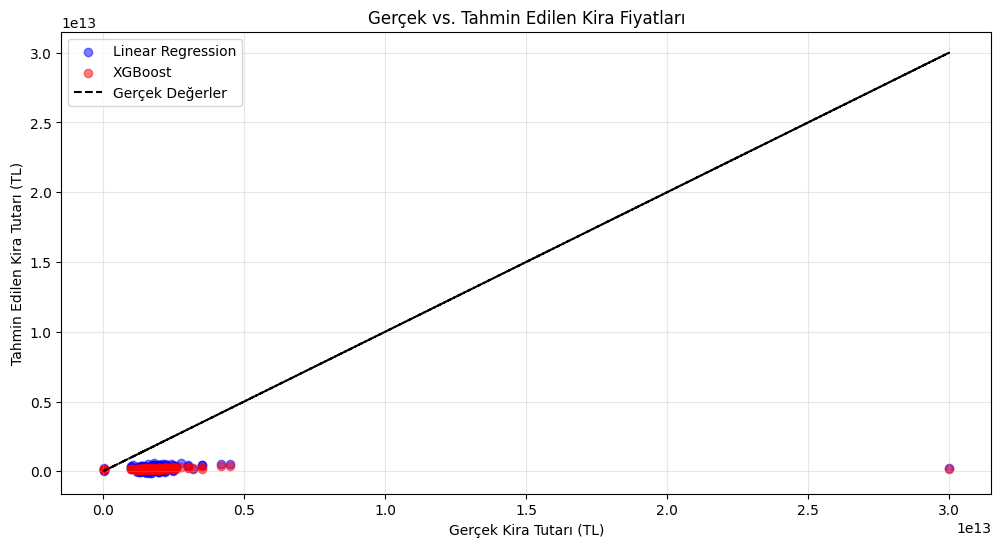

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Sonuçları tablo formatında gösterme
results = pd.DataFrame({
    "Model": ["Linear Regression", "XGBoost"],
    "RMSE": [rmse_lr, rmse_xgb],
    "MAPE": [mape_lr, mape_xgb]
})

print("\n📊 Regresyon Modelleri Karşılaştırması:")
print(results)


X = df.drop(columns=["price"])
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


y_pred_lr = lr_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)


# Gerçek ve Tahmin Edilen Fiyatları Görselleştirme
plt.figure(figsize=(12, 6))

plt.scatter(y_test, y_pred_lr, alpha=0.5, color="blue", label="Linear Regression")
plt.scatter(y_test, y_pred_xgb, alpha=0.5, color="red", label="XGBoost")
plt.plot(y_test, y_test, color="black", linestyle="--", label="Gerçek Değerler")

plt.title("Gerçek vs. Tahmin Edilen Kira Fiyatları")
plt.xlabel("Gerçek Kira Tutarı (TL)")
plt.ylabel("Tahmin Edilen Kira Tutarı (TL)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Kök Ortalama Kare Hata (RMSE): 2334272111864.26


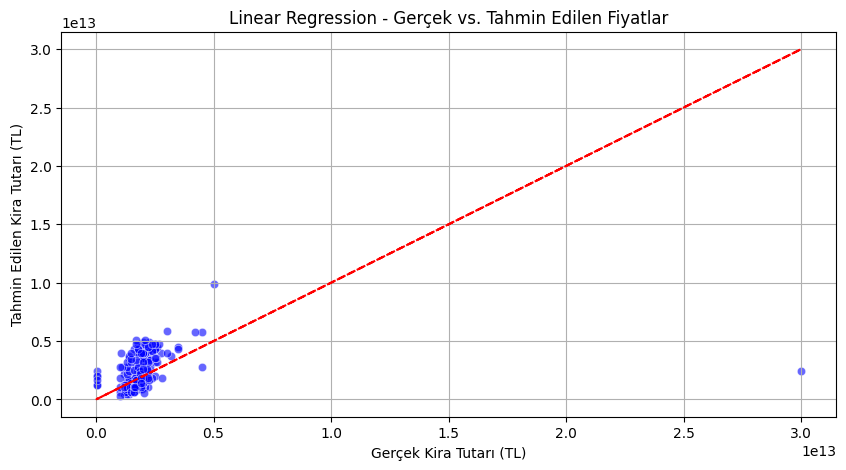

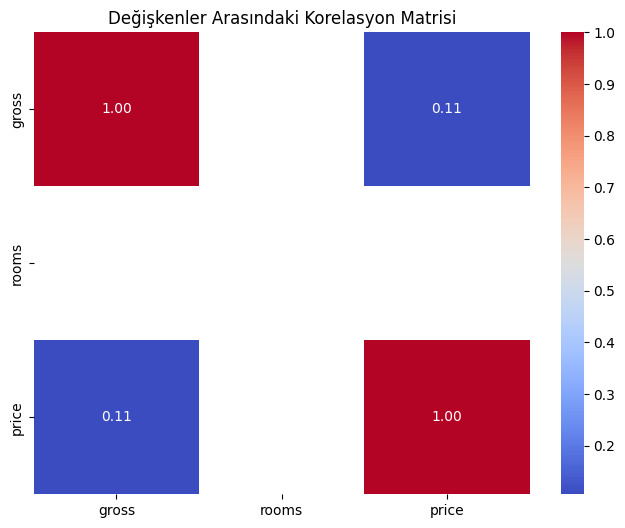

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Model performansı için ek metrik (RMSE)
rmse = np.sqrt(mse)
print(f"\nKök Ortalama Kare Hata (RMSE): {rmse:.2f}")

# Gerçek vs. Tahmin edilen fiyatları görselleştirme
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.6)
plt.plot(y_test, y_test, color="red", linestyle="--")  # Gerçek değerler
plt.xlabel("Gerçek Kira Tutarı (TL)")
plt.ylabel("Tahmin Edilen Kira Tutarı (TL)")
plt.title("Linear Regression - Gerçek vs. Tahmin Edilen Fiyatlar")
plt.grid(True)
plt.show()

# Korelasyon analizi
plt.figure(figsize=(8, 6))
sns.heatmap(df_model.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Değişkenler Arasındaki Korelasyon Matrisi")
plt.show()

In [ ]:
df.dropna(subset=['gross', 'rooms', 'age', 'floor'], inplace=True)

X = df[['gross', 'rooms', 'age', 'floor']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd


df_model = df[['gross', 'rooms', 'price']].dropna()
X = df_model[['gross', 'rooms']]
y = df_model['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Katsayıları yazdıralım
print("m2 değişkeninin katsayısı (β1):", model.coef_[0])
print("Oda sayısı değişkeninin katsayısı (β2):", model.coef_[1])
# print("Bina yaşı değişkeninin katsayısı (β3):", model.coef_[2]) # Removed as 'age' was not used in the last model
# print("Bulunduğu kat değişkeninin katsayısı (β4):", model.coef_[3]) # Removed as 'floor' was not used in the last model
print("Kesişim (β₀):", model.intercept_)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nOrtalama Kare Hata (MSE): {mse:.2f}")
print(f"R-kare (R²): {r2:.3f}")

m2 değişkeninin katsayısı (β1): 38541246806.41516
Oda sayısı değişkeninin katsayısı (β2): 0.0
Kesişim (β₀): -1058297472158.4409

Ortalama Kare Hata (MSE): 5448826292227219740688384.00
R-kare (R²): -0.281


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Sayısal dönüşüm ve eksik veri temizliği
df['price'] = pd.to_numeric(df['price'], errors='coerce').fillna(df['price'].mean())
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['rooms'] = pd.to_numeric(df['rooms'], errors='coerce')

# Sadece gerekli sütunlar ve eksik verileri at
df_model = df[['gross', 'rooms', 'price']].dropna()

# Bağımlı ve bağımsız değişkenleri ayır
X = df_model[['gross', 'rooms']]
y = df_model['price']

# Veriyi eğitim ve test setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Katsayıları yazdır
print("m2'nin kira tutarına etkisi (β1):", model.coef_[0])
print("Oda sayısının kira tutarına etkisi (β2):", model.coef_[1])
print("Sabit terim (β0):", model.intercept_)

# Test verisi ile tahmin
y_pred = model.predict(X_test)

# Model performansı
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nOrtalama Kare Hata (MSE): {mse:.2f}")
print(f"R-kare (R²): {r2:.3f}")

# Örnek fiyat tahmini
# Diyelim ki 100 m2 ve 3 odalı bir ev için kira tahmini yapalım
example = pd.DataFrame({'gross': [100], 'rooms': [3]})
predicted_rent = model.predict(example)[0]
print(f"\n100 m2 ve 3 odalı bir ev için tahmini kira: {predicted_rent:.2f} TL")

m2'nin kira tutarına etkisi (β1): 3854124680.641519
Oda sayısının kira tutarına etkisi (β2): 0.0
Sabit terim (β0): -105829747215.84436

Ortalama Kare Hata (MSE): 54488262922272201768960.00
R-kare (R²): -0.281

100 m2 ve 3 odalı bir ev için tahmini kira: 279582720848.31 TL


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi yükle
df = pd.read_csv("veri.csv")  # Örnek olarak dosya adı verdim

# Fiyat sütununu sayısal hale getir ve eksik değerleri ortalama ile doldur
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['price'].fillna(df['price'].median(), inplace=True)  # Ortalama yerine medyan kullanıldı

# Bağımsız değişkenleri sayısal hale getir
df['floor'] = pd.to_numeric(df['floor'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Eksik verileri sil
df_model = df[['floor', 'age', 'price']].dropna()

# Bağımsız ve bağımlı değişkenleri belirle
X = df_model[['floor', 'age']]
y = df_model['price']

# Veriyi ölçeklendir (standartlaştırma önemli!)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Eğitim ve test veri setlerine ayır
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Lineer regresyon modelini oluştur ve eğit
model = LinearRegression()
model.fit(X_train, y_train)

# Model katsayılarını incele
print("Bulunduğu katın katsayısı (β1):", model.coef_[0])
print("Bina yaşının katsayısı (β2):", model.coef_[1])
print("Sabit terim (β0):", model.intercept_)

# Tahmin yap
y_pred = model.predict(X_test)

# Performans değerlendirme
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nOrtalama Kare Hata (MSE): {mse:.2f}")
print(f"R-kare (R²): {r2:.3f}")

# Örnek tahmin: 5. katta ve 15 yaşındaki bina için
example = scaler.transform([[5, 15]])
predicted_rent = model.predict(example)[0]
print(f"\n5. katta ve 15 yıllık binada tahmini kira: {predicted_rent:.2f} TL")

Bulunduğu katın katsayısı (β1): 16909382049.903795
Bina yaşının katsayısı (β2): 6605945147.147214
Sabit terim (β0): -19143509414.91971

Ortalama Kare Hata (MSE): 54139959251453077356544.00
R-kare (R²): -0.273

5. katta ve 15 yıllık binada tahmini kira: 164492578041.81 TL



--- XGBoost Regresyon Modeli ---
XGBoost - Ortalama Kare Hata (MSE): 136101250005456086659760128.00
XGBoost - Ortalama Karekök Hata (RMSE): 11666244040198.03
XGBoost - R-kare (R²): -21.242
XGBoost - Ortalama Mutlak Yüzde Hata (MAPE): 1.979


<Figure size 1000x600 with 0 Axes>

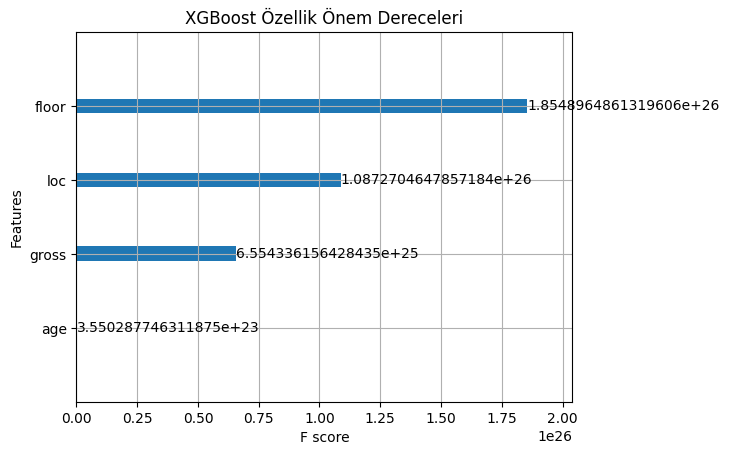

In [ ]:
# XGBoost Regresyon Modeli
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

print("\n--- XGBoost Regresyon Modeli ---")

# XGBoost modelini oluşturma ve eğitme
# Parametreler veri setine göre ayarlanabilir, bunlar başlangıç değerleridir.
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Regresyon görevi için
                             n_estimators=100,           # Ağaç sayısı
                             learning_rate=0.1,          # Öğrenme oranı
                             max_depth=5,                # Her ağacın maksimum derinliği
                             random_state=42)

xgb_model.fit(X_train, y_train)

# Tahmin yapma
y_pred_xgb = xgb_model.predict(X_test)

# Model Performansını Değerlendirme
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb) # RMSE hesaplama
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb) # MAPE hesaplama

print(f"XGBoost - Ortalama Kare Hata (MSE): {mse_xgb:.2f}")
print(f"XGBoost - Ortalama Karekök Hata (RMSE): {rmse_xgb:.2f}")
print(f"XGBoost - R-kare (R²): {r2_xgb:.3f}")
print(f"XGBoost - Ortalama Mutlak Yüzde Hata (MAPE): {mape_xgb:.3f}")

# Özellik Önem Dereceleri (Feature Importances) - XGBoost için
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
plt.title('XGBoost Özellik Önem Dereceleri')
plt.show()


--- Model Performans Kıyaslaması ---
               Model           MSE          RMSE  R2 Score   MAPE
0  Linear Regression  6.574694e+24  2.564117e+12    -0.074  2.158
1            XGBoost  1.365341e+26  1.168478e+13   -21.313  1.760


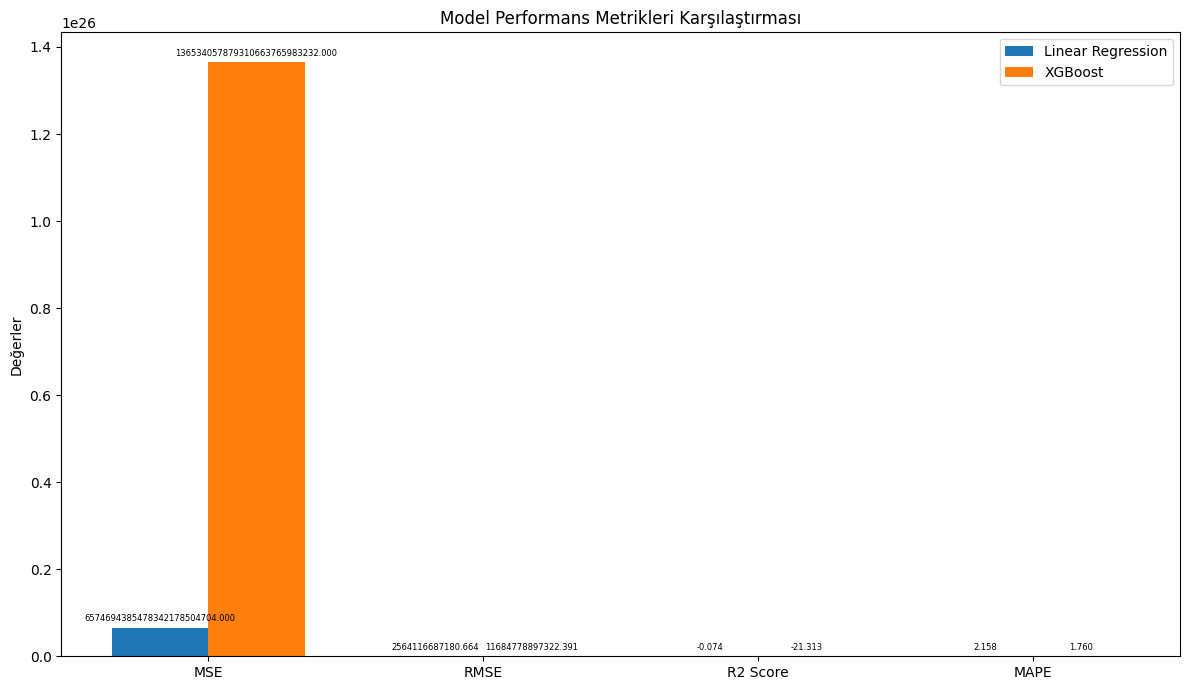


--- Sonuçlar ve Değerlendirme ---
Bu karşılaştırmaya göre, daha düşük MSE/RMSE ve daha yüksek R² değeri daha iyi bir model performansını gösterir.
MAPE, tahmin hatasının yüzde olarak ne kadar olduğunu gösterir. Daha düşük MAPE daha iyidir.
Genellikle XGBoost gibi ensemble modelleri, doğrusal modellerden daha iyi performans gösterirler, ancak bu veri setine bağlıdır.


In [ ]:
# --- Model Kıyaslaması ve Performans Raporu ---

# Not: mse_lr, rmse_lr, r2_lr, mape_lr değişkenlerinin Linear Regression modelinizin olduğu hücrede
# ve mse_xgb, rmse_xgb, r2_xgb, mape_xgb değişkenlerinin XGBoost modelinizin olduğu hücrede
# doğru bir şekilde tanımlandığından ve değer aldığından emin olun.

performance_data = {
    'Model': ['Linear Regression', 'XGBoost'],
    'MSE': [mse_lr, mse_xgb], # Bu değerler Linear Regression çıktınızdan gelmeli
    'RMSE': [rmse_lr, rmse_xgb], # Bu değerler Linear Regression çıktınızdan gelmeli
    'R2 Score': [r2_lr, r2_xgb], # Bu değerler Linear Regression çıktınızdan gelmeli
    'MAPE': [mape_lr, mape_xgb] # Bu değerler Linear Regression çıktınızdan gelmeli
}

performance_df = pd.DataFrame(performance_data)
print("\n--- Model Performans Kıyaslaması ---")
print(performance_df.round(3))

metrics = ['MSE', 'RMSE', 'R2 Score', 'MAPE']
x = np.arange(len(metrics))
width = 0.35

# Figür boyutunu artırarak grafiğin daha geniş olmasını sağlayalım
fig, ax = plt.subplots(figsize=(12, 7))

rects1 = ax.bar(x - width/2, performance_df.loc[0, metrics], width, label='Linear Regression')
rects2 = ax.bar(x + width/2, performance_df.loc[1, metrics], width, label='XGBoost')

ax.set_ylabel('Değerler')
ax.set_title('Model Performans Metrikleri Karşılaştırması')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom',
                    fontsize=6)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

print("\n--- Sonuçlar ve Değerlendirme ---")
print("Bu karşılaştırmaya göre, daha düşük MSE/RMSE ve daha yüksek R² değeri daha iyi bir model performansını gösterir.")
print("MAPE, tahmin hatasının yüzde olarak ne kadar olduğunu gösterir. Daha düşük MAPE daha iyidir.")
print("Genellikle XGBoost gibi ensemble modelleri, doğrusal modellerden daha iyi performans gösterirler, ancak bu veri setine bağlıdır.")